# Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points
- how useful are remuneration and spending scores data
- can social data (e.g. customer reviews) be used in marketing campaigns
- what is the impact on sales per product
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales

## 1.0 Linear regression using Python

The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

### 1. Load and explore the data

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load dataset and create dataframe
reviews = pd.read_csv("turtle_reviews.csv")

# View dataframe
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# Any missing values?
missing_vals = reviews.isna().count()
print("Number of non-missing values:")
missing_vals

Number of non-missing values:


gender                    2000
age                       2000
remuneration (k£)         2000
spending_score (1-100)    2000
loyalty_points            2000
education                 2000
language                  2000
platform                  2000
product                   2000
review                    2000
summary                   2000
dtype: int64

In [5]:
# Explore the data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Remove redundant columns
reviews.drop(columns = ['language', 'platform'],
                        axis = 1, inplace = True)

# View column names
reviews.columns.tolist()

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [8]:
# Rename the column headers.
reviews.rename(columns = {"remuneration (k£)": "Customer Salary",
                          "spending_score (1-100)": "Customer Spending"},
                          inplace = True)

# View column names.
reviews.columns

Index(['gender', 'age', 'Customer Salary', 'Customer Spending',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews.to_csv('turtle.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
df = pd.read_csv('turtle.csv')

# View DataFrame.
df.head()

,gender,age,Customer Salary,Customer Spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [11]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2000 non-null   object 
 1   age                2000 non-null   int64  
 2   Customer Salary    2000 non-null   float64
 3   Customer Spending  2000 non-null   int64  
 4   loyalty_points     2000 non-null   int64  
 5   education          2000 non-null   object 
 6   product            2000 non-null   int64  
 7   review             2000 non-null   object 
 8   summary            2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 5. Linear regression

### 5a) spending vs loyalty

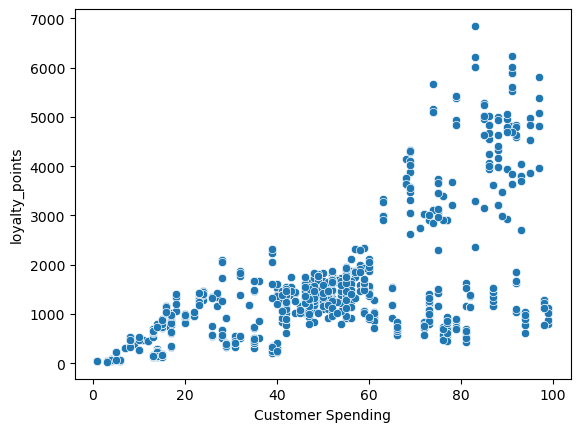

In [12]:
# Visualise relationship between customer spending and loyalty point
sns.scatterplot(data = df, 
                x = 'Customer Spending',
                y = 'loyalty_points');

In [13]:
# Independent variable.
x1 = df['Customer Spending']

# Dependent variable.
y = df['loyalty_points']

In [14]:
# Create a constant independant value
X1_with_const = sm.add_constant(x1)

# Create OlS model and summary 
model1 = sm.OLS(y, X1_with_const).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        11:53:35   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -75.0527     45.931     -1.634      0.102    -165.129      15.024
Customer Spending    33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Model suggests that customer spending (x) contributes by 45% to the variance in loyalty points (y)

In [15]:
# Extract estimated paramters, standard errors and predicted values
parameter = model1.params
se = model1.bse 
y_pred1 = model1.predict()

# Extract the estimated parameters.
print('Estimated Parameters:', parameter)
print('Standard error:', se)  
print('Predicted values:', y_pred1)

Estimated Parameters: const               -75.052663
Customer Spending    33.061693
dtype: float64
Standard error: const                45.930554
Customer Spending     0.814419
dtype: float64
Predicted values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficient': parameter, 
                                 'Standard Error': se})

# View the output.
print(regression_table)

                   Coefficient  Standard Error
const               -75.052663       45.930554
Customer Spending    33.061693        0.814419


- Coeffecient value tells us that if customer spending score goes up by 1, then customer loyalty points goes up by 33.

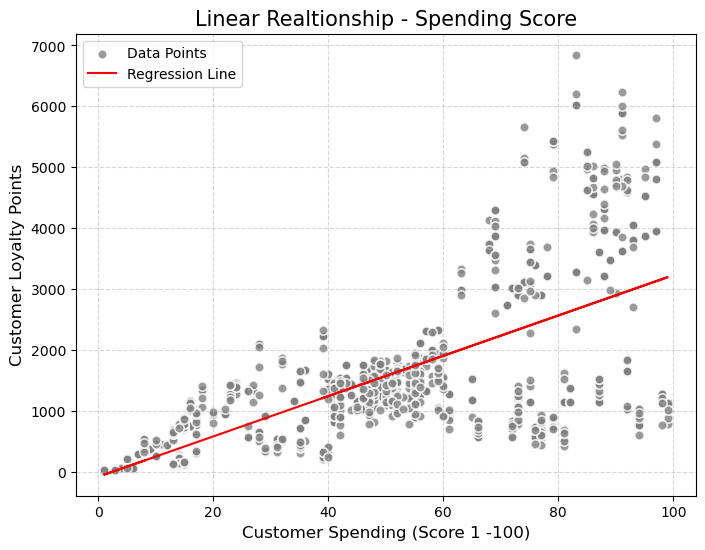

In [17]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data points with white borders
ax.scatter(x1, y, color='gray', edgecolor='white', label='Data Points', s=45, alpha=0.8, linewidth=1.2)

# Plot the regression line in blue
ax.plot(x1, y_pred1, color='red', label='Regression Line')

# Customize the background color by adding a grid
ax.grid(True, linestyle='--', alpha=0.5)

# Add labels and a legend
ax.set_xlabel('Customer Spending (Score 1 -100)', size = '12')
ax.set_ylabel('Customer Loyalty Points', size = '12')
ax.set_title('Linear Realtionship - Spending Score', size = '15')
ax.legend()

# Show the plot
plt.show()

- As the x (customer spending) and y (loyalty points) variables increase, the data spreads further away from the regression line.

### 5b) age vs loyalty

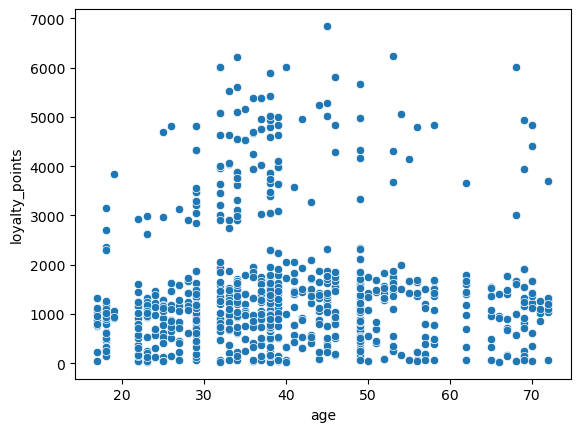

In [18]:
# Visualise relationship between customer age and loyalty point
sns.scatterplot(data = df, 
                x = 'age',
                y = 'loyalty_points');

In [19]:
# Independent variable.
x2 = df['age']

# Dependent variable. 
y = df['loyalty_points']

In [20]:
# Create a constant independant value
X2_with_const = sm.add_constant(x2)

# Create OlS model and summary 
model2 = sm.OLS(y, X2_with_const).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 09 Oct 2023   Prob (F-statistic):             0.0577
Time:                        11:53:40   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.000    1563.449    1909.587
age           -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- OLS model shows an R-squared value of 0.2%, indicating there is no correlation between age (x) and loyalty points (y)

In [21]:
# Extract estimated paramters, standard errors and predicted values
param2 = model2.params
se2 = model2.bse 
y_pred2 = model2.predict()

# Extract the estimated parameters.
print('Estimated Parameters:', param2)
print('Standard error:', se2)  
print('Predicted values:', y_pred2)

Estimated Parameters: const    1736.517739
age        -4.012805
dtype: float64
Standard error: const    88.248731
age       2.113177
dtype: float64
Predicted values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Generate regression table 
regression_table2 = pd.DataFrame({'Coefficient': param2, 
                                 'Standard Error': se2})

# View regression table
print(regression_table2)

       Coefficient  Standard Error
const  1736.517739       88.248731
age      -4.012805        2.113177


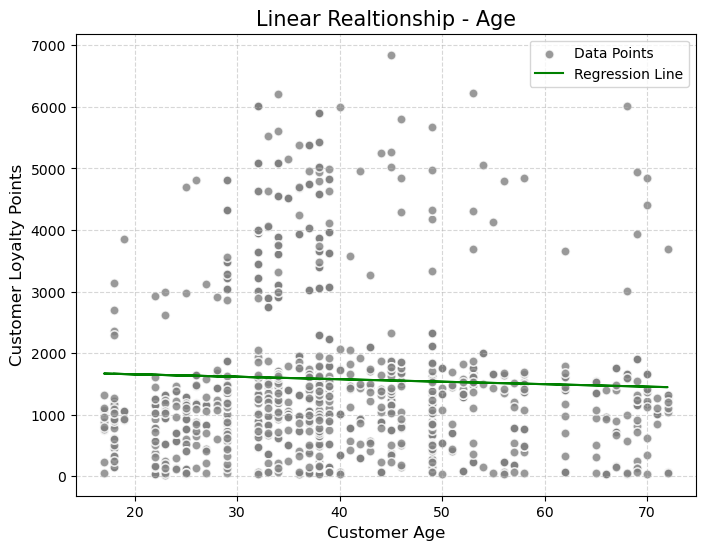

In [23]:
# Plot graph with regression line.
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data points with white borders
ax.scatter(x2, y, color='gray', edgecolor='white', label='Data Points', s=45, alpha=0.8, linewidth=1.2)

# Plot the regression line in blue
ax.plot(x2, y_pred2, color='green', label='Regression Line')

# Customize the background color by adding a grid
ax.grid(True, linestyle='--', alpha=0.5)

# Add labels and a legend
ax.set_xlabel('Customer Age', size = '12')
ax.set_ylabel('Customer Loyalty Points', size = '12')
ax.set_title('Linear Realtionship - Age', size = '15')
ax.legend()

# Show the plot
plt.show()

### 5c) Salary vs loyalty

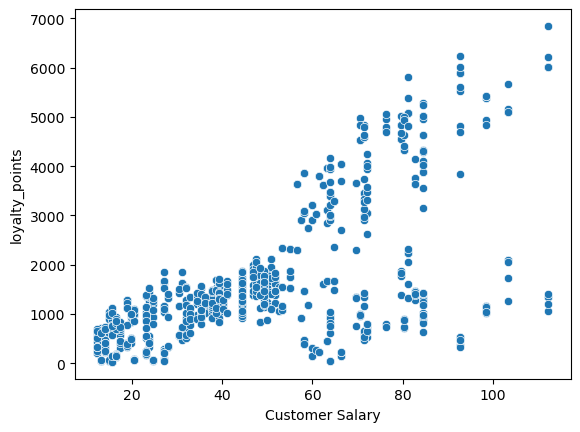

In [24]:
# Visualise relationship between customer age and loyalty point
sns.scatterplot(data = df, 
                x = 'Customer Salary',
                y = 'loyalty_points');

In [25]:
# Independent variable.
x3 = df['Customer Salary']

# Dependent variable.
y = df['loyalty_points']

In [26]:
# Create a constant independant value
X3_with_const = sm.add_constant(x3)

# Create OlS model and summary 
model3 = sm.OLS(y, X3_with_const).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        11:53:46   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -65.6865     52.171     -1.259      0.208    -168.001      36.628
Customer Salary    34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- OLS model shows an R-squared of 38% suggesting that customer salary contributes to 38% of variance in loyalty points

In [27]:
# Extract estimated paramters, standard errors and predicted values
param3 = model3.params
se3 = model3.bse 
y_pred3 = model3.predict()

# Extract the estimated parameters.
print('Estimated Parameters:', param3)
print('Standard error:', se3)  
print('Predicted values:', y_pred3)

Estimated Parameters: const             -65.686513
Customer Salary    34.187825
dtype: float64
Standard error: const              52.170717
Customer Salary     0.977925
dtype: float64
Predicted values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [28]:
# Generate regression table 
regression_table3 = pd.DataFrame({'Coefficient': param3, 
                                 'Standard Error': se3})

# View regrebssion table
print(regression_table3)

                 Coefficient  Standard Error
const             -65.686513       52.170717
Customer Salary    34.187825        0.977925


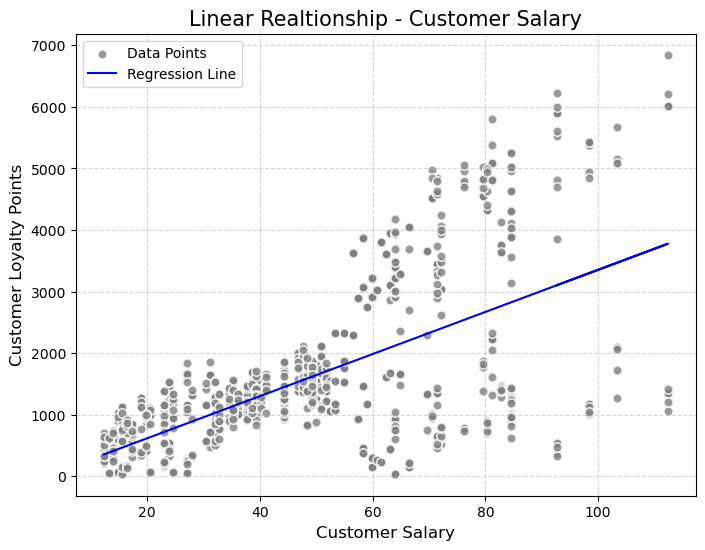

In [29]:
# Plot graph with regression line.
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of the data points with white borders
ax.scatter(x3, y, color='gray', edgecolor='white', label='Data Points', s=45, alpha=0.8, linewidth=1.2)

# Plot the regression line in blue
ax.plot(x3, y_pred3, color='blue', label='Regression Line')

# Customize the background color by adding a grid
ax.grid(True, linestyle='--', alpha=0.5)

# Add labels and a legend
ax.set_xlabel('Customer Salary', size = '12')
ax.set_ylabel('Customer Loyalty Points', size = '12')
ax.set_title('Linear Realtionship - Customer Salary', size = '15')
ax.legend()

# Show the plot
plt.show()

## 5d) pay vs spending

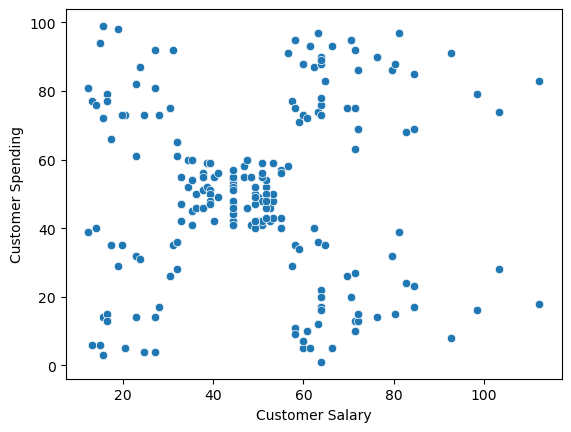

In [30]:
# Visualise relationship between customer age and loyalty point
sns.scatterplot(data = df, 
                x = 'Customer Salary',
                y = 'Customer Spending');

## 6. Observations and insights

- Customer salary and spending are positively correlated to customer loyalty points
- Customer salary and spending are not correlated, which reduces the chance of multiple collinearity in an MLR model
- No correlation between age and loyalty points
- Linear model suggests that spending contributes to 45% (R-squared value) of variance in loyalty points.
- Coefficient value suggests that if spending score goes up by 1, loyalty points increase by 33.
- Linear model suggests that salary contributes to 38% (R-squared value) of variance in loyalty points.
- Coefficient value suggests that if salary score goes up by £1k, loyalty points increase by 34


# 2.0 Clustering with *k*-means using Python

Identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## 1. Load and explore the data

In [31]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [32]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle.csv')

# View DataFrame.
df2.head()

,gender,age,Customer Salary,Customer Spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [33]:
# Drop unnecessary columns.
df2 = df2.drop(columns = ['age','loyalty_points','education','product', 'review', 'summary'])

# View DataFrame.
df2

,gender,Customer Salary,Customer Spending
0,Male,12.30,39
1,Male,12.30,81
2,Female,13.12,6
3,Female,13.12,77
4,Female,13.94,40
...,...,...,...
1995,Female,84.46,69
1996,Female,92.66,8
1997,Male,92.66,91
1998,Male,98.40,16


In [34]:
# Explore the data.
print(df2.columns)

Index(['gender', 'Customer Salary', 'Customer Spending'], dtype='object')


In [35]:
# Descriptive statistics.
df2.describe()

,Customer Salary,Customer Spending
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<Axes: xlabel='Customer Salary', ylabel='Customer Spending'>

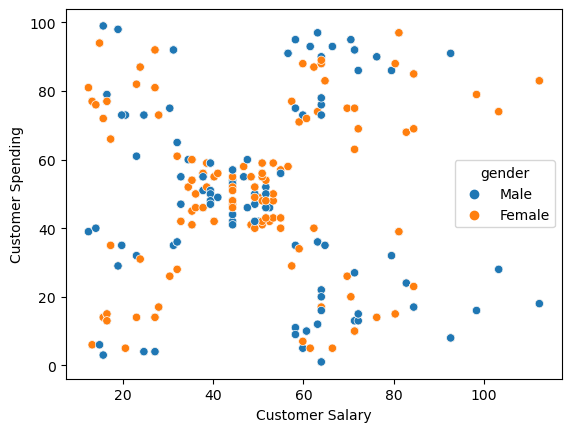

In [36]:
# Create a scatterplot with Seaborn.

sns.scatterplot(x = 'Customer Salary',
                y = 'Customer Spending',
                data = df2,
                hue = 'gender')

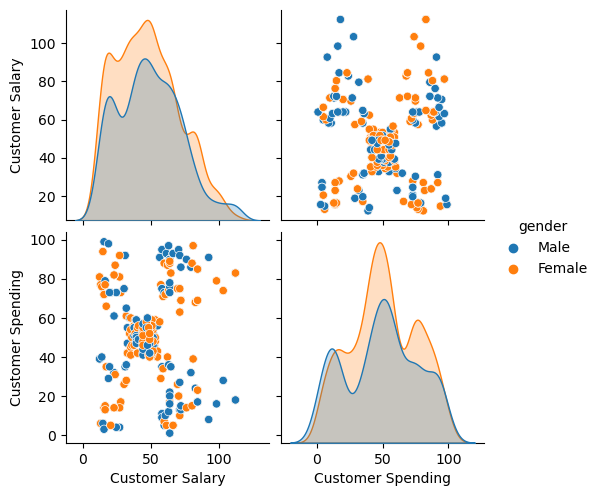

In [37]:
# Create a pairplot with Seaborn.
x = df2[['Customer Salary', 'Customer Spending']]

sns.pairplot(df2,
             vars=x,
             hue='gender',
             diag_kind='kde')

- Pairplot shows female customers have a higher salary and spend more in comparison to male customers

## 3. Elbow and silhoutte methods

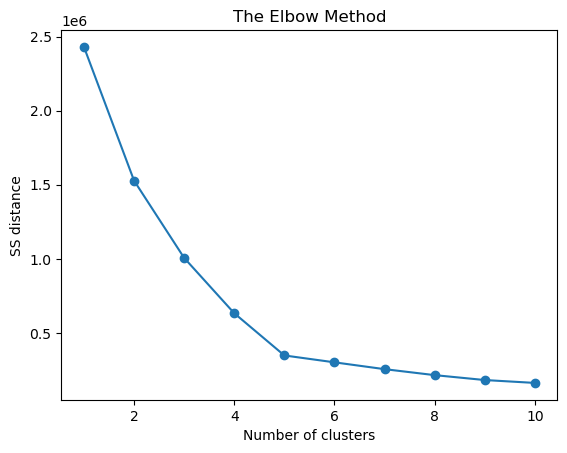

In [38]:
# Determine the number of clusters: Elbow method.

ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

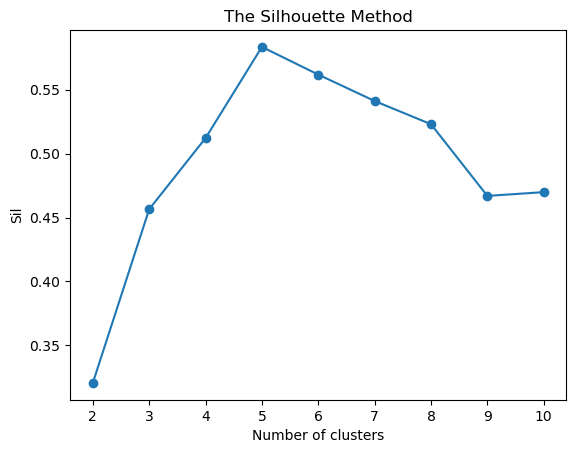

In [39]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

- Scatterplot, Elbow method and silhoette method all strongly suggest that k = 5, indicating there are 5 groups within the data

## 4. Evaluate k-means model at different values of *k*
## (3, 4 ,5)

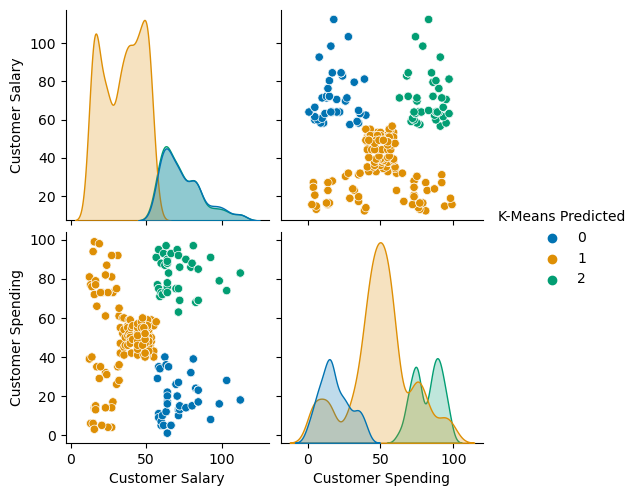

In [40]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

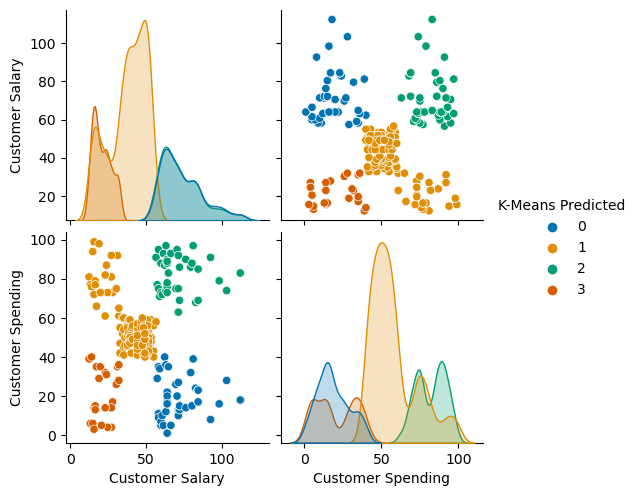

In [41]:
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

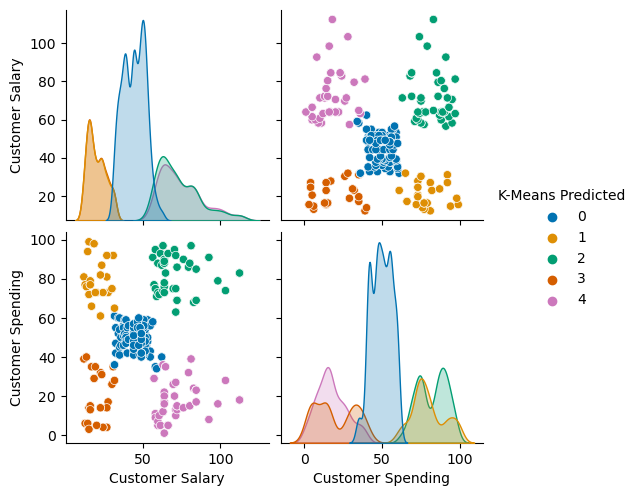

In [42]:
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette = 'colorblind')

## 5. Fit final model and justify your choice

- I chose k = 5, as all models (scatterplot, elbow method and silhouette method) strongly suggests k=5

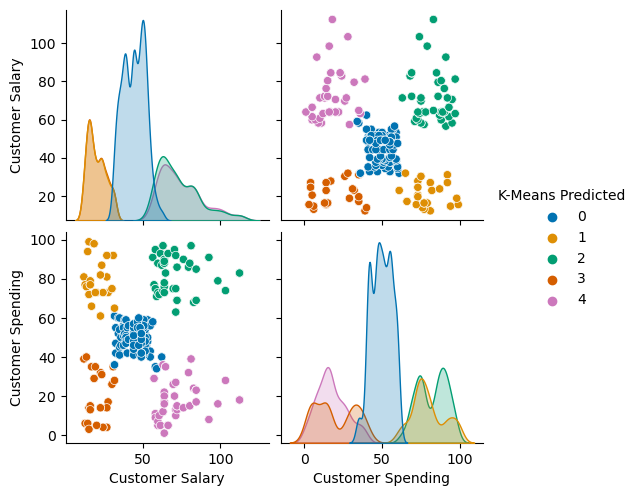

In [43]:
# Apply the final model.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
            palette='colorblind');

plt.savefig('clusters.png')

In [44]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [45]:
# Visualising the K-Means predicted
print(x.head())

   Customer Salary  Customer Spending  K-Means Predicted
0            12.30                 39                  3
1            12.30                 81                  1
2            13.12                  6                  3
3            13.12                 77                  1
4            13.94                 40                  3


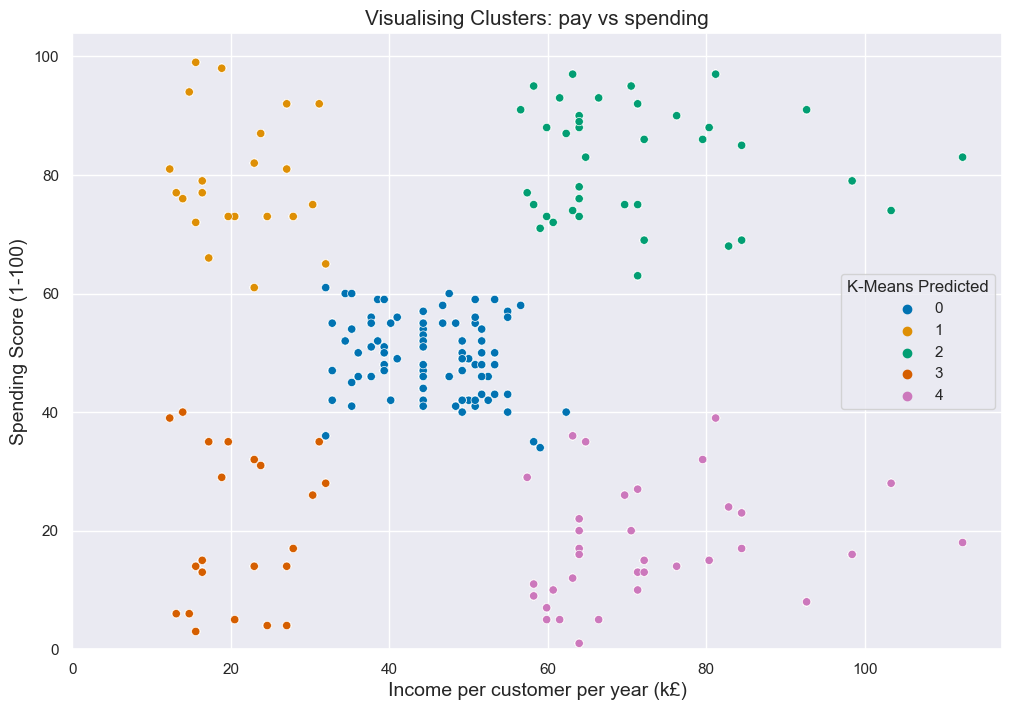

In [46]:
# Visualising the clusters
# Set plot size
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='Customer Salary' , 
                y ='Customer Spending',
                data=x,
                hue='K-Means Predicted',
                palette= 'colorblind')

plt.xlim(0)
plt.ylim(0)
plt.title('Visualising Clusters: pay vs spending', fontsize = 15)
plt.xlabel('Income per customer per year (k£)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.savefig('clusters.png');

## 7. Insights and observations

- All data points suggests there are 5 clusters within the data.
- Scatterplot confirms that 5 is the best value for k
- Pairplot shows female customers are payed more and spend more
- These groups can be described as: 
- •	0 - Customers with average income (£40 -60k) and medium spending scores (40-60)

- •	1 - Customer with low income (less than £30k) and high spending scores (>60)
- •	2 – Customers with high incomes (>£60k) and high spending score (>60)
- •	3 - Customers with low income (less than £30k) and low spending score (<40)
- •	4 - Customers with high income (>£60k) and low spending score (<40)

# 

# 3. NLP using Python

Identify the 15 most common words used in online product reviews. Create a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## 1. Load and explore the data

In [47]:
!pip install wordcloud
!pip install textblob

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import wordcloud
import textblob

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [48]:
# Load the data set as df3.
df3 = pd.read_csv('turtle.csv')

# View DataFrame.
df3.head(10)

,gender,age,Customer Salary,Customer Spending,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
5,Female,24,13.94,76,573,PhD,977,Grandson loves,Five Stars
6,Female,37,14.76,6,61,diploma,979,"I have bought many gm screens over the years, ...",Best gm screen ever
7,Female,25,14.76,94,772,graduate,1012,Came in perfect condition.,Five Stars
8,Male,66,15.58,3,31,PhD,1031,Could be better but its still great. I love th...,Great but could be even better
9,Female,32,15.58,72,724,PhD,1459,My review will mirror others in that this kind...,Another missed opportunity. Not a value add t...


In [49]:
# Explore data set.
df3.shape

(2000, 9)

In [50]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review','summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [51]:
# Determine if there are any missing values.
df3.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [52]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].str.lower( )

In [53]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].str.lower( )

In [54]:
# Check changes 
df3.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [55]:
import re

In [56]:
# Replace all the punctuations in review column.
df3['review'] = [re.sub('[^\w\s]+', '', s) for s in df3['review'].tolist()]

# View output.
df3['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9\n\nyour unpainted...
2       nice art nice printing  why two panels are fil...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1995    the perfect word game for mixed ages with mom ...
1996    great game  did not think i would like it when...
1997            great game for all\nkeeps the mind nimble
1998                                             fun game
1999    this game is fun a lot like scrabble without a...
Name: review, Length: 2000, dtype: object

In [57]:
# Replace all the puncuations in summary column.
df3['summary'] = [re.sub('[^\w\s]+', '', s) for s in df3['summary'].tolist()]

# View output.
df3['summary']

0       the fact that 50 of this space is wasted on ar...
1       another worthless dungeon masters screen from ...
2                          pretty but also pretty useless
3                                              five stars
4                                              money trap
                              ...                        
1995        the perfect word game for mixed ages with mom
1996                                            super fun
1997                                           great game
1998                                           four stars
1999                                       love this game
Name: summary, Length: 2000, dtype: object

### 2c) Drop duplicates in both columns

In [58]:
# Determine number of duplicate rows
df3.duplicated().sum()

39

In [59]:
# Identify duplicated rows
duplicates = df3[df3.duplicated()]

# Display duplicate values 
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
                               review     summary
94                              great  five stars
326                           love it  five stars
371                             great  five stars
404                              good  five stars
408                             great  five stars
416                           love it  five stars
430                           love it  five stars
576                             great  five stars
810                        great game  five stars
811                        great game  five stars
959                           love it  five stars
979                        great game  five stars
1006                       great game  five stars
1013                        i love it  five stars
1037                          awesome  five stars
1050                       great game  five stars
1145                             nice  five stars
1155             ontime and nice item  five stars
1186                             

Due to the generic nature of the reviews they do not need to be removed as it is very possible that the comments can be made by different customers

## 3. Tokenise and create wordclouds

In [60]:
# Create new DataFrame (copy DataFrame).
new_df = df3

# View DataFrame.
new_df

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


In [61]:
# Apply tokenisation to both columns.
new_df['review_tokens'] = new_df['review'].apply(word_tokenize)
new_df['summary_tokens'] = new_df['summary'].apply(word_tokenize)

# View DataFrame.
new_df.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [62]:
# Review: Create a word cloud.
wordcloud_review = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_review.generate(' '.join(new_df['review_tokens'].apply(' '.join)))

(-0.5, 1599.5, 899.5, -0.5)

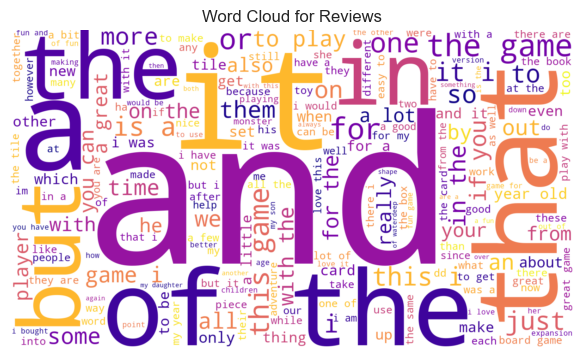

In [63]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')

In [64]:
# Summary: Create a word cloud.
# Review: Create a word cloud.
wordcloud_summary = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_review.generate(' '.join(new_df['summary_tokens'].apply(' '.join)))

(-0.5, 1599.5, 899.5, -0.5)

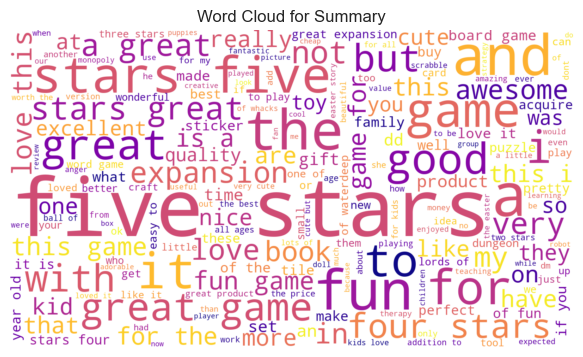

In [65]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title('Word Cloud for Summary')
plt.axis('off')

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [66]:
new_df.head()

,review,summary,review_tokens,summary_tokens
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [67]:
# Import the FreqDist class
from nltk.probability import FreqDist

In [68]:
# Combine all tokens into a single text for both columns
new_df['review_text'] = new_df['review_tokens'].apply(' '.join)
new_df['summary_text'] = new_df['summary_tokens'].apply(' '.join)

In [69]:
# Create frequency distribution for the 'review' column
all_review_tokens = [token for tokens in new_df['review_tokens'] for token in tokens]
freq_dist_review = FreqDist(all_review_tokens)

# View frequency distribution for 'review'
print("Frequency Distribution for 'review' column:")
print(freq_dist_review)

Frequency Distribution for 'review' column:
<FreqDist with 7520 samples and 112202 outcomes>


In [70]:
# Create frequency distribution for the 'summary' column
all_summary_tokens = [token for tokens in new_df['summary_tokens'] for token in tokens]
freq_dist_summary = FreqDist(all_summary_tokens)

# View frequency distribution for 'summary'
print("\nFrequency Distribution for 'summary' column:")
print(freq_dist_summary)


Frequency Distribution for 'summary' column:
<FreqDist with 1550 samples and 9359 outcomes>


In [71]:
# Display the 15 most common words in each column
most_common_review = freq_dist_review.most_common(15)
most_common_summary = freq_dist_summary.most_common(15)

print("15 Most Common Words in 'review_text':")
for word, freq in most_common_review:
    print(f'{word}: {freq}')

print("\n15 Most Common Words in 'summary_text':")
for word, freq in most_common_summary:
    print(f'{word}: {freq}')

15 Most Common Words in 'review_text':
the: 5452
and: 3234
to: 3164
a: 3161
of: 2488
i: 2091
it: 2090
is: 1782
this: 1776
game: 1685
for: 1545
with: 1265
you: 1177
in: 1148
that: 1067

15 Most Common Words in 'summary_text':
stars: 466
five: 381
game: 319
great: 295
the: 261
a: 240
for: 232
fun: 218
to: 192
and: 168
it: 150
of: 139
this: 135
is: 103
love: 93


### 4b) Remove alphanumeric characters

In [72]:
# Delete all the alpha-numeric characters
all_review_tokens = [word for word in all_review_tokens if word.isalnum()]
all_summary_tokens = [word for word in all_summary_tokens if word.isalnum()]

### 4c) Remove stopwords

In [73]:
# Create a set of stopwords
stop_words = set(stopwords.words('english'))

In [74]:
# Remove stopword in reviews
rev_stopwords = [word for word in all_review_tokens if word.lower() not in stop_words]

# Recalculate frequency after removing stopwords
freq_dist_review2 = FreqDist(rev_stopwords)

# View frequecy 
freq_dist_review2

FreqDist({'game': 1685, 'great': 596, 'fun': 553, 'one': 530, 'play': 502, 'like': 414, 'love': 331, 'really': 319, 'get': 319, 'cards': 301, ...})

In [75]:
wordcloud_review = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_review.generate(' '.join(new_df['review_tokens'].apply(' '.join)))

In [76]:
# Remove stopword in reviews
sum_stopwords = [word for word in all_summary_tokens if word.lower() not in stop_words]

# Recalculate frequency after removing stopwords
freq_dist_summary2 = FreqDist(sum_stopwords)

# View frequecy 
freq_dist_summary2

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4c) Create wordcloud without stopwords

In [77]:
# Create a wordcloud without stop words.
# Review: Create a word cloud.
wordcloud_review = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_review.generate(" ".join(rev_stopwords))

(-0.5, 1599.5, 899.5, -0.5)

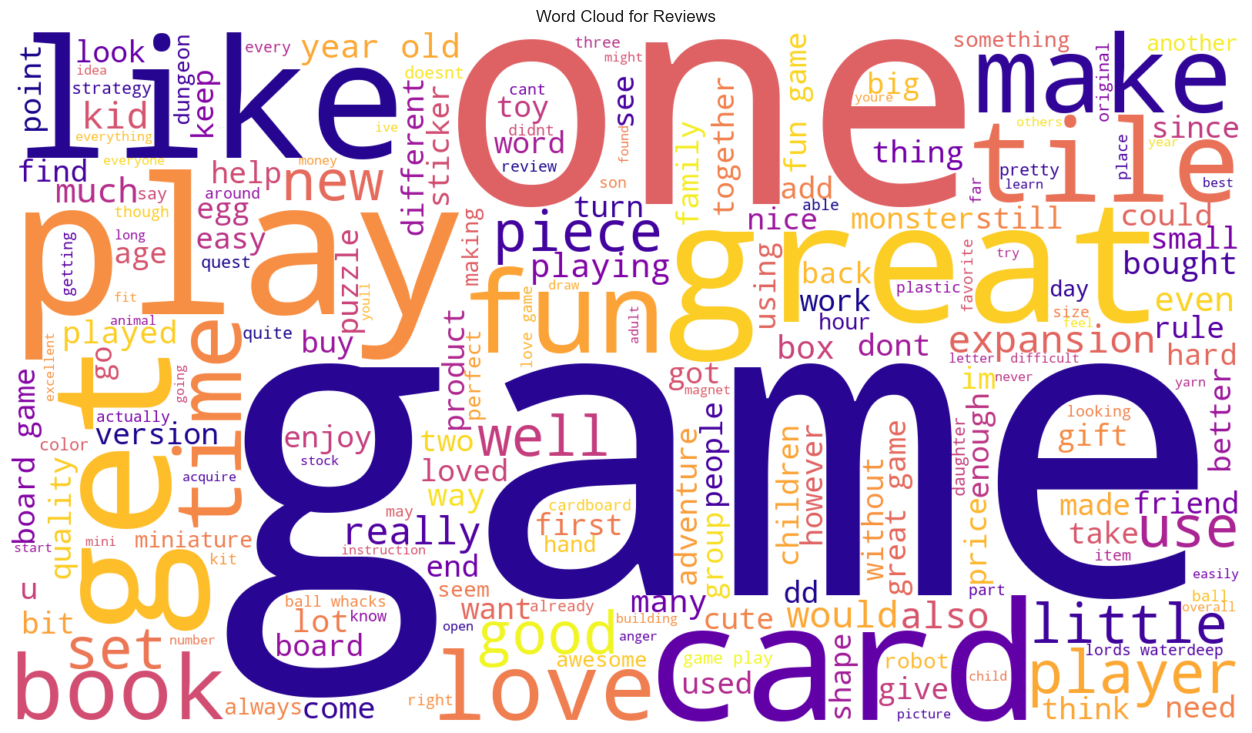

In [78]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title('Word Cloud for Reviews')
plt.axis('off')

In [79]:
# Create a wordcloud without stop words.
# Summary: Create a word cloud.
wordcloud_summary = WordCloud(
    width = 1600, 
    height = 900, 
    background_color ='white', 
    colormap='plasma',
    stopwords = 'none',
    min_font_size = 10)

# Generate wordcloud
wordcloud_review.generate(" ".join(sum_stopwords))

(-0.5, 1599.5, 899.5, -0.5)

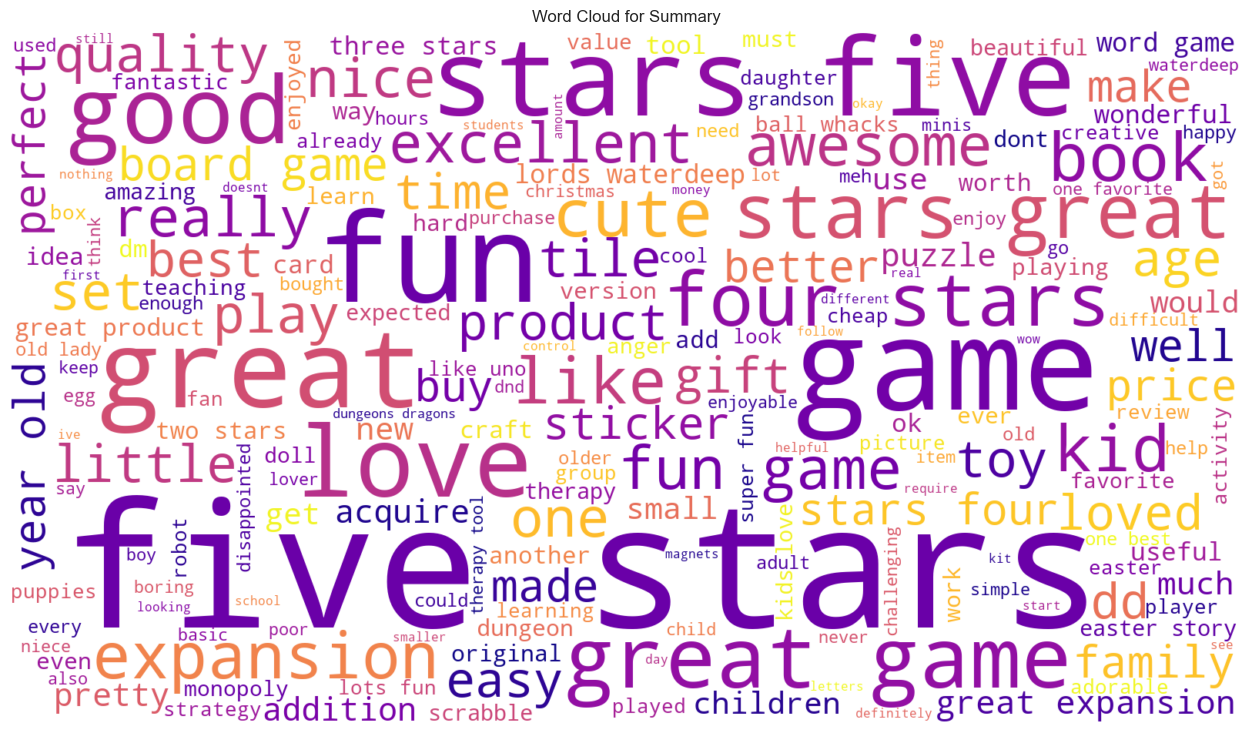

In [80]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud_review, interpolation='bilinear')
plt.title('Word Cloud for Summary')
plt.axis('off')

### 4d) Identify 15 most common words and polarity

In [81]:
# Determine the 15 most common words.
# Display the 15 most common words in each column
most_common_review = freq_dist_review2.most_common(15)
most_common_summary = freq_dist_summary2.most_common(15)

print("15 Most Common Words in 'review_text':")
for word, freq in most_common_review:
    print(f'{word}: {freq}')

print("\n15 Most Common Words in 'summary_text':")
for word, freq in most_common_summary:
    print(f'{word}: {freq}')

15 Most Common Words in 'review_text':
game: 1685
great: 596
fun: 553
one: 530
play: 502
like: 414
love: 331
really: 319
get: 319
cards: 301
tiles: 297
good: 294
time: 291
would: 280
book: 273

15 Most Common Words in 'summary_text':
stars: 466
five: 381
game: 319
great: 295
fun: 218
love: 93
good: 92
four: 58
like: 54
expansion: 52
kids: 50
cute: 45
book: 43
one: 38
awesome: 36


In [82]:
# Calculate sentiment polarity for the 15 most common words in 'review_text'
for word, _ in most_common_review:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity
    print(f'{word}: Polarity = {word_polarity}')

game: Polarity = -0.4
great: Polarity = 0.8
fun: Polarity = 0.3
one: Polarity = 0.0
play: Polarity = 0.0
like: Polarity = 0.0
love: Polarity = 0.5
really: Polarity = 0.2
get: Polarity = 0.0
cards: Polarity = 0.0
tiles: Polarity = 0.0
good: Polarity = 0.7
time: Polarity = 0.0
would: Polarity = 0.0
book: Polarity = 0.0


In [83]:
# Calculate sentiment polarity for the 15 most common words in 'summary_text'
for word, _ in most_common_summary:
    blob = TextBlob(word)
    word_polarity = blob.sentiment.polarity
    print(f'{word}: Polarity = {word_polarity}')

stars: Polarity = 0.0
five: Polarity = 0.0
game: Polarity = -0.4
great: Polarity = 0.8
fun: Polarity = 0.3
love: Polarity = 0.5
good: Polarity = 0.7
four: Polarity = 0.0
like: Polarity = 0.0
expansion: Polarity = 0.0
kids: Polarity = 0.0
cute: Polarity = 0.5
book: Polarity = 0.0
one: Polarity = 0.0
awesome: Polarity = 1.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [84]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [85]:
# Determine polarity of both columns. 
new_df['review_polarity'] = new_df['review'].apply(generate_polarity)
new_df['summary_polarity'] = new_df['summary'].apply(generate_polarity)

# View output.
new_df.head(10)

,review,summary,review_tokens,summary_tokens,review_text,summary_text,review_polarity,summary_polarity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",as my review of gf9s previous screens these we...,money trap,-0.316667,0.00
5,grandson loves,five stars,"[grandson, loves]","[five, stars]",grandson loves,five stars,0.000000,0.00
6,i have bought many gm screens over the years b...,best gm screen ever,"[i, have, bought, many, gm, screens, over, the...","[best, gm, screen, ever]",i have bought many gm screens over the years b...,best gm screen ever,0.660000,1.00
7,came in perfect condition,five stars,"[came, in, perfect, condition]","[five, stars]",came in perfect condition,five stars,1.000000,0.00
8,could be better but its still great i love the...,great but could be even better,"[could, be, better, but, its, still, great, i,...","[great, but, could, be, even, better]",could be better but its still great i love the...,great but could be even better,0.372222,0.65
9,my review will mirror others in that this kind...,another missed opportunity not a value add to...,"[my, review, will, mirror, others, in, that, t...","[another, missed, opportunity, not, a, value, ...",my review will mirror others in that this kind...,another missed opportunity not a value add to ...,0.145537,0.00


Text(0, 0.5, 'Review Frequency')

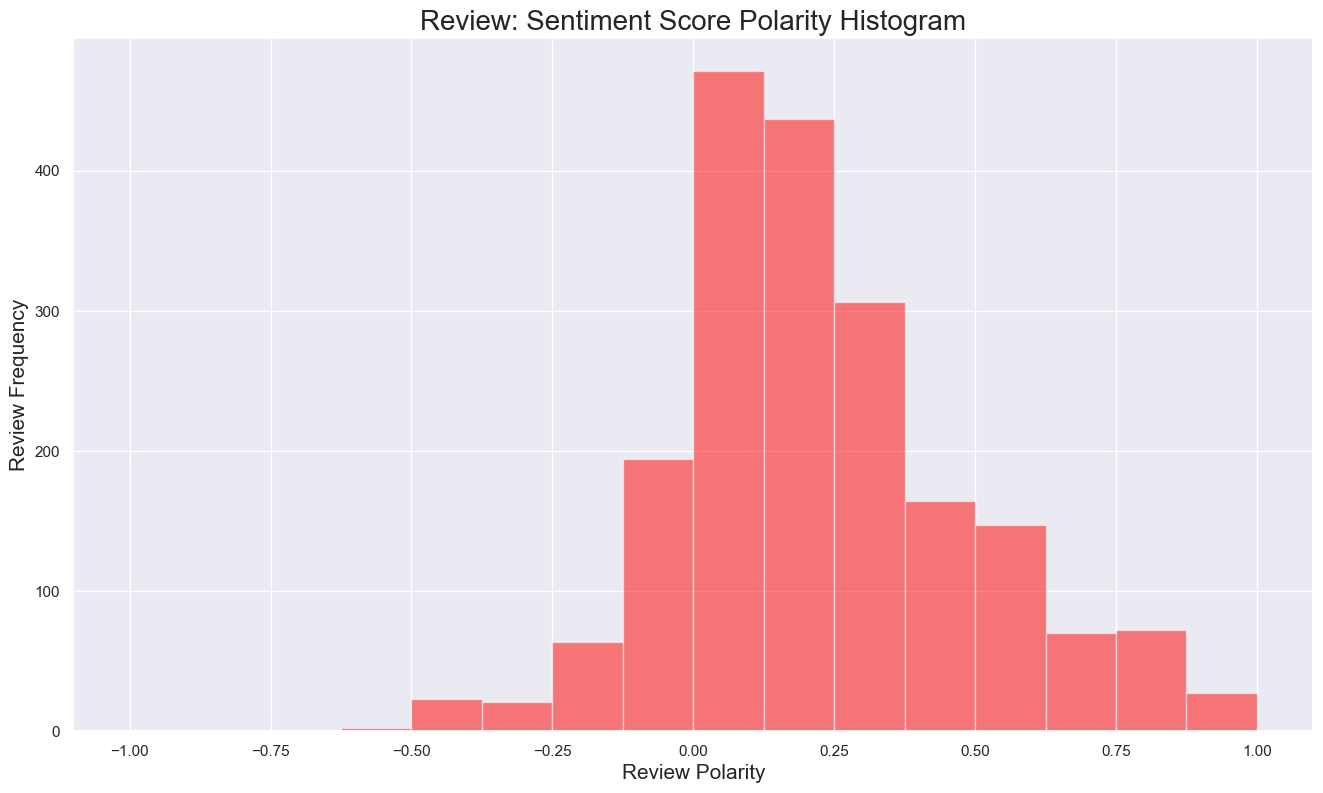

In [87]:
# Review: Create a histogram plot with bins = 16.
# Histogram of polarity
plt.figure(figsize = (16,9))
plt.hist(new_df['review_polarity'], bins=16, alpha=0.5, facecolor='red')

# Set labels 
plt.title('Review: Sentiment Score Polarity Histogram', fontsize = 20)
plt.xlabel('Review Polarity', fontsize=15)
plt.ylabel('Review Frequency', fontsize=15)

Text(0, 0.5, 'Summart Frequency')

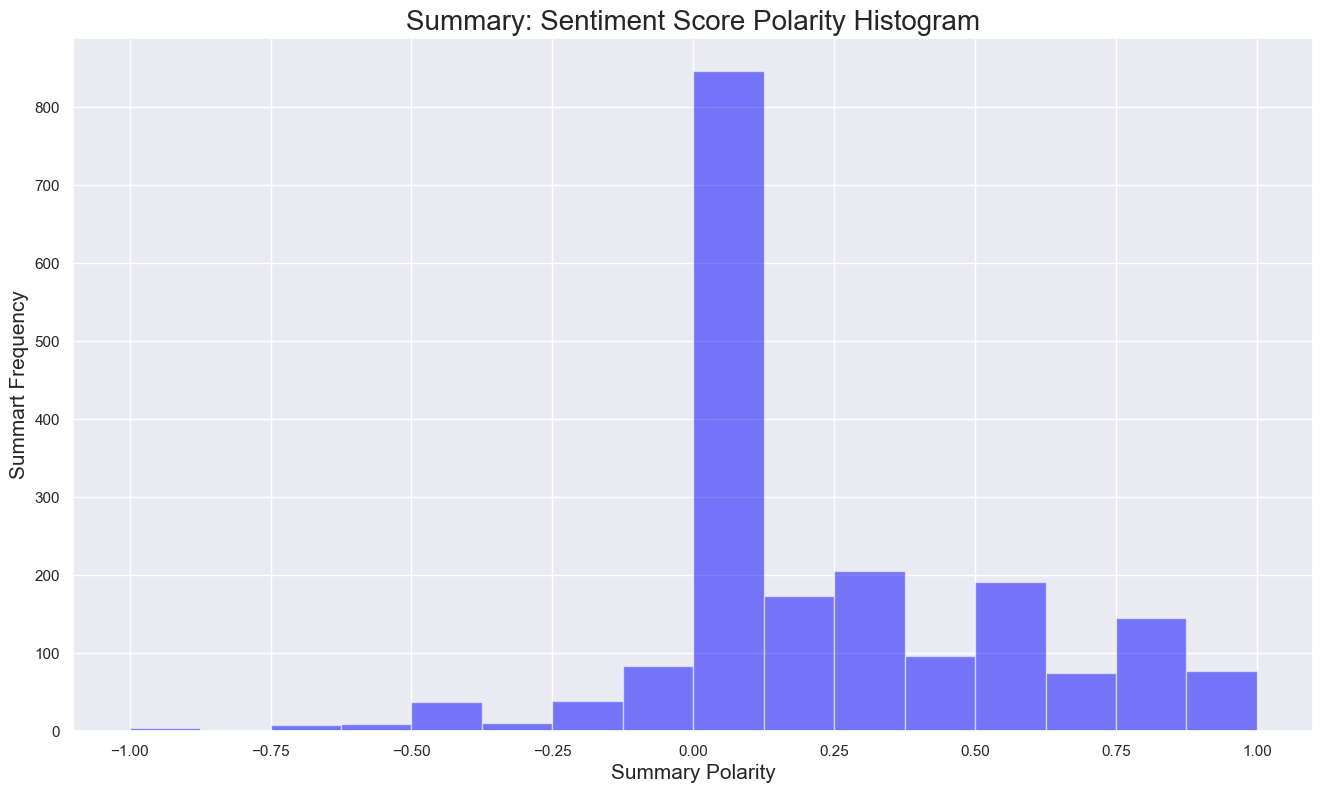

In [88]:
# Summary: Create a histogram plot with bins = 16.
plt.figure(figsize = (16,9))
plt.hist(new_df['summary_polarity'], bins=16, alpha=0.5, facecolor='blue')

# Set labels 
plt.title('Summary: Sentiment Score Polarity Histogram', fontsize = 20)
plt.xlabel('Summary Polarity', fontsize=15)
plt.ylabel('Summart Frequency', fontsize=15)

In [91]:
# Define a function to extract a polarity score for the comment.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [92]:
# Determine subjectivity of both columns. 
new_df['review_subjectivity'] = new_df['review'].apply(generate_subjectivity)
new_df['summary_subjectivity'] = new_df['summary'].apply(generate_subjectivity)

# View output.
new_df.head(10)

,review,summary,review_tokens,summary_tokens,review_text,summary_text,review_polarity,summary_polarity,review_subjectivity,summary_subjectivity
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.15,0.486111,0.500000
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,0.035952,-0.80,0.442976,0.900000
2,nice art nice printing why two panels are fil...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",nice art nice printing why two panels are fill...,pretty but also pretty useless,0.116640,0.00,0.430435,0.733333
3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.00,0.784848,0.000000
4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",as my review of gf9s previous screens these we...,money trap,-0.316667,0.00,0.316667,0.000000
5,grandson loves,five stars,"[grandson, loves]","[five, stars]",grandson loves,five stars,0.000000,0.00,0.000000,0.000000
6,i have bought many gm screens over the years b...,best gm screen ever,"[i, have, bought, many, gm, screens, over, the...","[best, gm, screen, ever]",i have bought many gm screens over the years b...,best gm screen ever,0.660000,1.00,0.700000,0.300000
7,came in perfect condition,five stars,"[came, in, perfect, condition]","[five, stars]",came in perfect condition,five stars,1.000000,0.00,1.000000,0.000000
8,could be better but its still great i love the...,great but could be even better,"[could, be, better, but, its, still, great, i,...","[great, but, could, be, even, better]",could be better but its still great i love the...,great but could be even better,0.372222,0.65,0.463889,0.625000
9,my review will mirror others in that this kind...,another missed opportunity not a value add to...,"[my, review, will, mirror, others, in, that, t...","[another, missed, opportunity, not, a, value, ...",my review will mirror others in that this kind...,another missed opportunity not a value add to ...,0.145537,0.00,0.492162,0.000000


Text(0, 0.5, 'Review Frequency')

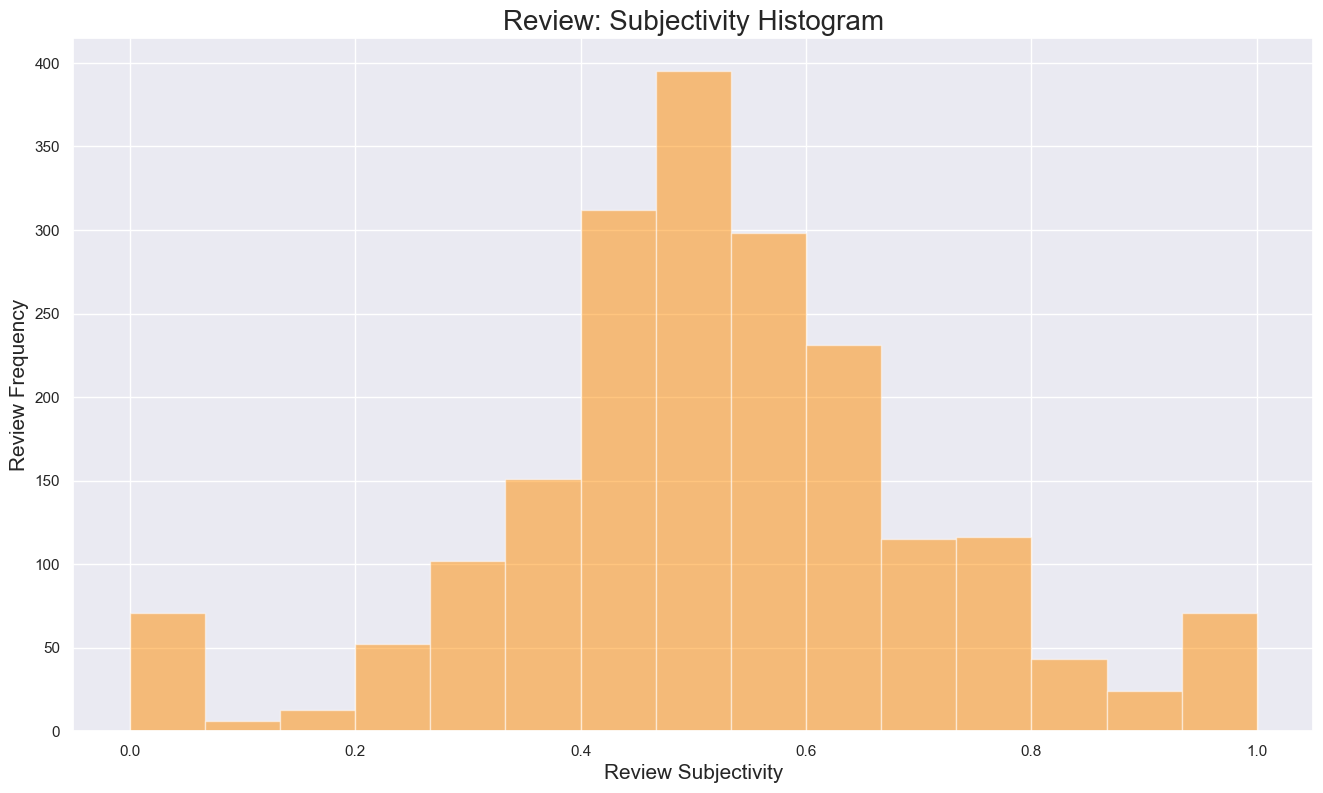

In [93]:
# Histogram of subjectivity
plt.figure(figsize = (16,9))
plt.hist(new_df['review_subjectivity'], bins=15, alpha=0.5, facecolor='darkorange')

# Set labels 
plt.title('Review: Subjectivity Histogram', fontsize = 20)
plt.xlabel('Review Subjectivity', fontsize=15)
plt.ylabel('Review Frequency', fontsize=15)

Text(0, 0.5, 'Summary Frequency')

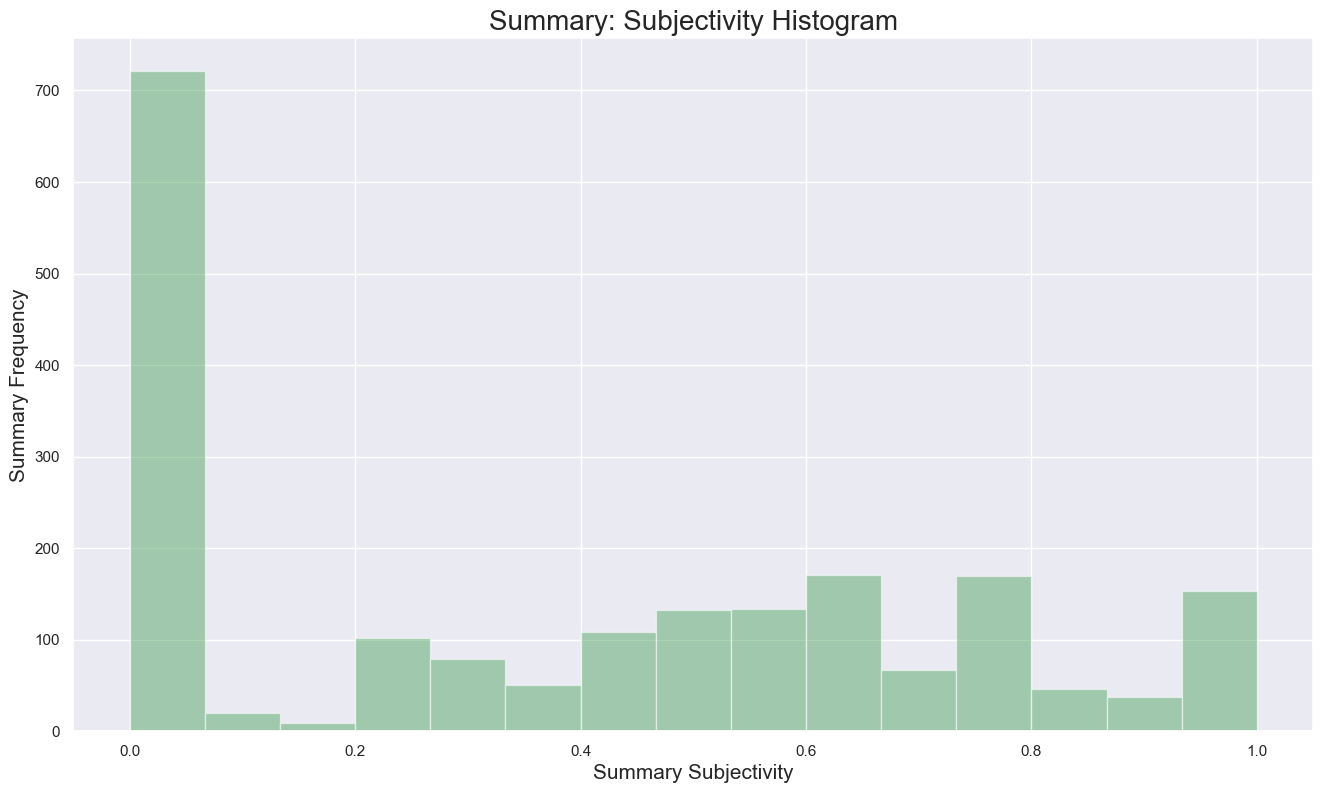

In [94]:
# Histogram of subjectivity
plt.figure(figsize = (16,9))
plt.hist(new_df['summary_subjectivity'], bins=15, alpha=0.5, facecolor='g')

# Set labels 
plt.title('Summary: Subjectivity Histogram', fontsize = 20)
plt.xlabel('Summary Subjectivity', fontsize=15)
plt.ylabel('Summary Frequency', fontsize=15)

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [90]:
# Top 20 negative reviews.
top_negative_reviews = new_df.nsmallest(20, 'review_polarity')

# Set Pandas display option to show full 'review' column content
top_negative_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print("\nTop 20 Negative Reviews:")
top_negative_reviews[['review', 'review_polarity']]


Top 20 Negative Reviews:


,review,review_polarity
208,booo unles you are patient know how to measur...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
117,i bought this as a christmas gift for my grand...,-0.500000
227,this was a gift for my daughter i found it di...,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
1524,expensive for what you get,-0.500000


In [91]:
# Top 20 negative summaries.
top_negative_summaries = new_df.nsmallest(20, 'summary_polarity')

# Set Pandas display option to show full 'summary' column content
top_negative_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print("\nTop 20 Negative Summaries:")
top_negative_reviews[['summary', 'summary_polarity']]


Top 20 Negative Summaries:


,summary,summary_polarity
208,boring unless you are a craft person which i am,-1.00
182,incomplete kit,0.00
1804,disappointing,-0.60
364,anger control game,-0.55
117,stickers,0.00
227,two stars,0.00
230,three stars,0.00
290,two stars,0.00
301,three stars,0.00
1524,two stars,0.00


In [92]:
# Top 20 positive reviews.
top_positive_reviews = new_df.nlargest(20, 'review_polarity')

# View output.
print("\nTop 20 Positive Reviews:")
top_positive_reviews[['review', 'review_polarity']]


Top 20 Positive Reviews:


,review,review_polarity
7,came in perfect condition,1.0
165,awesome book,1.0
194,awesome gift,1.0
496,excellent activity for teaching selfmanagement...,1.0
524,perfect just what i ordered,1.0
591,wonderful product,1.0
609,delightful product,1.0
621,wonderful for my grandson to learn the resurre...,1.0
790,perfect,1.0
933,awesome,1.0


In [93]:
# Top 20 positive summaries.
top_positive_summaries = new_df.nlargest(20, 'summary_polarity')

# View output.
print("\nTop 20 Positive Summaries:")
top_positive_summaries[['summary', 'summary_polarity']]


Top 20 Positive Summaries:


,summary,summary_polarity
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or ...,1.0
134,perfect for preschooler,1.0
140,awesome sticker activity for the price,1.0
161,awesome book,1.0
163,he was very happy with his gift,1.0
187,awesome,1.0
210,awesome and welldesigned for 9 year olds,1.0


## 7. Insights and observations


- Textblob and Vader sentiment suggests positive feedback
- Polarity may be skewed due to words like 'five','stars','like' and 'four' which all appear in the 15 most common words used in summaries was given a neutral score, although they are positive.
- Further NLP analysis needed as comments like 'i bought this for my son he loves this game' and 'was a gift for my son he loves the game' is given a negative score
- Top Negative comments can be used as constructive criticism to improve buisness and reduce negative feedback
- These can be further analysed by looking into specific games that recieved positive or negative feedback to get a better understanding of trends and customer interest.